# Implementación de la QFT para 4 cubits

In [12]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.compiler import assemble, transpile
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
IBMQ.save_account('f33574e4ee70dc79fa2cc13196842a585bd84475ea12349568c2c649874d3a9bec1c6b58c70de7d7406b83d41b26368d0fd6ec73671834b56911a6f0cbbb1c31')

configrc.store_credentials:WARNING:2021-04-17 00:25:13,381: Credentials already present. Set overwrite=True to overwrite.


In [2]:
def qft_4qbits(qc):

    qc.h(3)
    qc.cp(pi/2,2,3)
    qc.cp(pi/4,1,3)
    qc.cp(pi/8,0,3)
    qc.barrier()

    qc.h(2)
    qc.cp(pi/2,1,2)
    qc.cp(pi/4,0,2)
    qc.barrier()

    qc.h(1)
    qc.cp(pi/2,0,1)
    qc.barrier()

    qc.h(0)
          
    qc.swap(0,3)
    qc.swap(1,2)

In [3]:
qc = QuantumCircuit(4,4)

#inicializo los cubits a |1101> (13 en binario)
qc.x(3)
qc.x(2)
qc.x(0)

#añadimos la transformada cuántica de fourier al circuito
qc.barrier()
qft_4qbits(qc)
qc.draw()

┌───┐ ░                                     ░                           ░ »
q_0: ┤ X ├─░──────────────────────────────■──────░────────────────────■──────░─»
     └───┘ ░                              │      ░                    │      ░ »
q_1: ──────░────────────────────■─────────┼──────░──────────■─────────┼──────░─»
     ┌───┐ ░                    │         │      ░ ┌───┐┌───┴────┐┌───┴────┐ ░ »
q_2: ┤ X ├─░──────────■─────────┼─────────┼──────░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├─░─»
     ├───┤ ░ ┌───┐┌───┴────┐┌───┴────┐┌───┴────┐ ░ └───┘└────────┘└────────┘ ░ »
q_3: ┤ X ├─░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├┤ P(π/8) ├─░───────────────────────────░─»
     └───┘ ░ └───┘└────────┘└────────┘└────────┘ ░                           ░ »
c: 4/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                     ░ ┌───┐   
«q_0: ─────────■──────░─┤ H ├─X─
«     ┌───┐┌───┴────┐ ░ └───┘ │ 
«q_1: ┤ H ├┤ P(π/2) ├─░───X───┼─
«     └───┘└────────┘ ░   │   │ 
«q_2: ────────────────░───X───┼─
«                     ░       │ 
«q_3: ────────────────░───────X─
«                     ░         
«c: 4/══════════════════════════
«

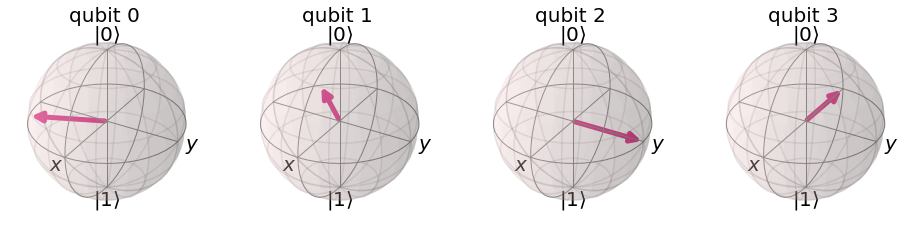

In [4]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

### Comentario:

Como podemos ver, hemos empezado con el estado |1011> (que es 13 en binario) y podemos observar como en el qubit 0 se ha rotado 13/16, el cubit 1 ha rotado 26/16 (igual a rotar 10/16), el cubit 2 ha rotado 52/16 (igual a rotar 4/16) y el cubit 3 ha rotado 104/16 (igual a rotar 8/16). 

De esta manera vemos que la transformada cuántica de fourier ha funcionado.

------

## QFT inversa

In [6]:
def inverse_qft_4qbits(qc):
    
    qc.swap(0,3)
    qc.swap(1,2)
    
    qc.h(0)
    
    qc.barrier()
    qc.cp(-pi/2,0,1)
    qc.h(1)

    qc.barrier()
    qc.cp(-pi/4,0,2)
    qc.cp(-pi/2,1,2)
    qc.h(2)
    
    qc.barrier()
    qc.cp(-pi/8,0,3)
    qc.cp(-pi/4,1,3)
    qc.cp(-pi/2,2,3)  
    qc.h(3)

In [7]:
qc.barrier()
inverse_qft_4qbits(qc)
qc.barrier()
qc.measure([0,1,2,3],[0,1,2,3])
qc.draw()

┌───┐ ░                                     ░                           ░ »
q_0: ┤ X ├─░──────────────────────────────■──────░────────────────────■──────░─»
     └───┘ ░                              │      ░                    │      ░ »
q_1: ──────░────────────────────■─────────┼──────░──────────■─────────┼──────░─»
     ┌───┐ ░                    │         │      ░ ┌───┐┌───┴────┐┌───┴────┐ ░ »
q_2: ┤ X ├─░──────────■─────────┼─────────┼──────░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├─░─»
     ├───┤ ░ ┌───┐┌───┴────┐┌───┴────┐┌───┴────┐ ░ └───┘└────────┘└────────┘ ░ »
q_3: ┤ X ├─░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├┤ P(π/8) ├─░───────────────────────────░─»
     └───┘ ░ └───┘└────────┘└────────┘└────────┘ ░                           ░ »
c: 4/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                     ░ ┌───┐    ░  ░    ┌───┐ ░                  ░            »
«q_0: ─────────■──────░─┤ H ├─X──░──░──X─┤ H ├─░──────■───────────░──────■─────»
«     ┌───┐┌───┴────┐ ░ └───┘ │  ░  ░  │ └───┘ ░ ┌────┴────┐┌───┐ ░      │     »
«q_1: ┤ H ├┤ P(π/2) ├─░───X───┼──░──░──┼───X───░─┤ P(-π/2) ├┤ H ├─░──────┼─────»
«     └───┘└────────┘ ░   │   │  ░  ░  │   │   ░ └─────────┘└───┘ ░ ┌────┴────┐»
«q_2: ────────────────░───X───┼──░──░──┼───X───░──────────────────░─┤ P(-π/4) ├»
«                     ░       │  ░  ░  │       ░                  ░ └─────────┘»
«q_3: ────────────────░───────X──░──░──X───────░──────────────────░────────────»
«                     ░          ░  ░          ░                  ░            »
«c: 4/═════════════════════════════════════════════════════════════════════════»
«                                                                              »
«                      ░                                        ░ ┌─┐         
«q_0: ─────────────────░──────■─────────────────────────────────░─┤M├─────────
«                      ░      │                                 ░ └╥┘┌─┐      
«q_1: ─────■───────────░──────┼──────────■──────────────────────░──╫─┤M├──────
«     ┌────┴────┐┌───┐ ░      │          │                      ░  ║ └╥┘┌─┐   
«q_2: ┤ P(-π/2) ├┤ H ├─░──────┼──────────┼──────────■───────────░──╫──╫─┤M├───
«     └─────────┘└───┘ ░ ┌────┴────┐┌────┴────┐┌────┴────┐┌───┐ ░  ║  ║ └╥┘┌─┐
«q_3: ─────────────────░─┤ P(-π/8) ├┤ P(-π/4) ├┤ P(-π/2) ├┤ H ├─░──╫──╫──╫─┤M├
«                      ░ └─────────┘└─────────┘└─────────┘└───┘ ░  ║  ║  ║ └╥┘
«c: 4/═════════════════════════════════════════════════════════════╩══╩══╩══╩═
«                                                                  0  1  2  3

In [8]:
sim = Aer.get_backend("qasm_simulator")
job = execute(qc,sim,shots=1000)
result = job.result()
counts = result.get_counts(qc)

print(counts)

{'1101': 1000}


### Comentario:

Al aplicar la inversa a nuestra qft, un 100% de las veces obtenemos el resultado original |1101> por lo que podemos ver como nuestra QFT funciona y la QFT inversa también

---------

## Ejecución en un backend real de la QFT

In [9]:
qc = QuantumCircuit(4,4)
qc.x(3)
qc.x(2)
qc.x(0)
qc.barrier()
qft_4qbits(qc)
qc.draw()
qc.barrier()
inverse_qft_4qbits(qc)
qc.barrier()
qc.measure([0,1,2,3],[0,1,2,3])

┌───┐ ░                                     ░                           ░ »
q_0: ┤ X ├─░──────────────────────────────■──────░────────────────────■──────░─»
     └───┘ ░                              │      ░                    │      ░ »
q_1: ──────░────────────────────■─────────┼──────░──────────■─────────┼──────░─»
     ┌───┐ ░                    │         │      ░ ┌───┐┌───┴────┐┌───┴────┐ ░ »
q_2: ┤ X ├─░──────────■─────────┼─────────┼──────░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├─░─»
     ├───┤ ░ ┌───┐┌───┴────┐┌───┴────┐┌───┴────┐ ░ └───┘└────────┘└────────┘ ░ »
q_3: ┤ X ├─░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├┤ P(π/8) ├─░───────────────────────────░─»
     └───┘ ░ └───┘└────────┘└────────┘└────────┘ ░                           ░ »
c: 4/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                     ░ ┌───┐    ░    ┌───┐ ░                  ░            »
«q_0: ─────────■──────░─┤ H ├─X──░──X─┤ H ├─░──────■───────────░──────■─────»
«     ┌───┐┌───┴────┐ ░ └───┘ │  ░  │ └───┘ ░ ┌────┴────┐┌───┐ ░      │     »
«q_1: ┤ H ├┤ P(π/2) ├─░───X───┼──░──┼───X───░─┤ P(-π/2) ├┤ H ├─░──────┼─────»
«     └───┘└────────┘ ░   │   │  ░  │   │   ░ └─────────┘└───┘ ░ ┌────┴────┐»
«q_2: ────────────────░───X───┼──░──┼───X───░──────────────────░─┤ P(-π/4) ├»
«                     ░       │  ░  │       ░                  ░ └─────────┘»
«q_3: ────────────────░───────X──░──X───────░──────────────────░────────────»
«                     ░          ░          ░                  ░            »
«c: 4/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                      ░                                        ░ ┌─┐         
«q_0: ─────────────────░──────■─────────────────────────────────░─┤M├─────────
«                      ░      │                                 ░ └╥┘┌─┐      
«q_1: ─────■───────────░──────┼──────────■──────────────────────░──╫─┤M├──────
«     ┌────┴────┐┌───┐ ░      │          │                      ░  ║ └╥┘┌─┐   
«q_2: ┤ P(-π/2) ├┤ H ├─░──────┼──────────┼──────────■───────────░──╫──╫─┤M├───
«     └─────────┘└───┘ ░ ┌────┴────┐┌────┴────┐┌────┴────┐┌───┐ ░  ║  ║ └╥┘┌─┐
«q_3: ─────────────────░─┤ P(-π/8) ├┤ P(-π/4) ├┤ P(-π/2) ├┤ H ├─░──╫──╫──╫─┤M├
«                      ░ └─────────┘└─────────┘└─────────┘└───┘ ░  ║  ║  ║ └╥┘
«c: 4/═════════════════════════════════════════════════════════════╩══╩══╩══╩═
«                                                                  0  1  2  3

In [13]:
# First, see what devices we are allowed to use by loading our saved accounts
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

ibmqfactory.load_account:WARNING:2021-04-17 00:25:41,236: Credentials are already in use. The existing account in the session will be replaced.


In [14]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))

In [15]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
qobj = assemble(transpiled_qc, shots=shots)
job = backend.run(qobj)
job_monitor(job)

Job Status: job has successfully run


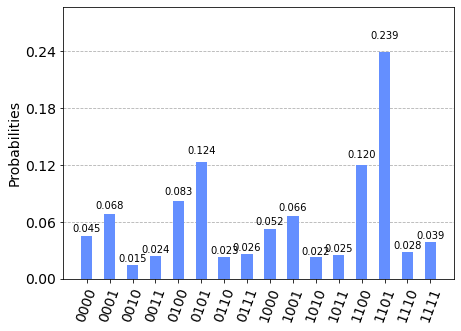

In [16]:
counts = job.result().get_counts()
plot_histogram(counts)

### Comentario:

Como vemos 1101 es el resultado que más sale de todos, pero pese a esto, el ruido hace que solo salga un 23,9%  de las veces (debería salir un 100%) por lo que es un resultado bastante malo.

# Implementación de la AQFT para 4 cubits y 2 rotaciones

In [17]:
def aqft_4qbits_2rot(qc):

    qc.h(3)
    qc.cp(pi/2,2,3)
    qc.cp(pi/4,1,3)
    qc.barrier()

    qc.h(2)
    qc.cp(pi/2,1,2)
    qc.cp(pi/4,0,2)
    qc.barrier()

    qc.h(1)
    qc.cp(pi/2,0,1)
    qc.barrier()

    qc.h(0)
          
    qc.swap(0,3)
    qc.swap(1,2)
    
def inverse_aqft_4qbits_2rot(qc):
    
    qc.swap(0,3)
    qc.swap(1,2)
    
    qc.h(0)
    
    qc.barrier()
    qc.cp(-pi/2,0,1)        
    qc.h(1)
    
    qc.barrier()
    qc.cp(-pi/4,0,2)
    qc.cp(-pi/2,1,2)
    qc.h(2)
    
    qc.barrier()   
    qc.cp(-pi/4,1,3)    
    qc.cp(-pi/2,2,3)    
    qc.h(3)    


In [23]:
qc = QuantumCircuit(4,4)

#inicializo los cubits a |1101> (13 en binario)
qc.x(3)
qc.x(2)
qc.x(0)

#añadimos la transformada cuántica de fourier al circuito
qc.barrier()
aqft_4qbits_2rot(qc)
qc.draw()

┌───┐ ░                           ░                           ░      »
q_0: ┤ X ├─░───────────────────────────░────────────────────■──────░──────»
     └───┘ ░                           ░                    │      ░ ┌───┐»
q_1: ──────░────────────────────■──────░──────────■─────────┼──────░─┤ H ├»
     ┌───┐ ░                    │      ░ ┌───┐┌───┴────┐┌───┴────┐ ░ └───┘»
q_2: ┤ X ├─░──────────■─────────┼──────░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├─░──────»
     ├───┤ ░ ┌───┐┌───┴────┐┌───┴────┐ ░ └───┘└────────┘└────────┘ ░      »
q_3: ┤ X ├─░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├─░───────────────────────────░──────»
     └───┘ ░ └───┘└────────┘└────────┘ ░                           ░      »
c: 4/═════════════════════════════════════════════════════════════════════»
                                                                          »
«                ░ ┌───┐   
«q_0: ────■──────░─┤ H ├─X─
«     ┌───┴────┐ ░ └───┘ │ 
«q_1: ┤ P(π/2) ├─░───X───┼─
«     └────────┘ ░   │   │ 
«q_2: ───────────░───X───┼─
«                ░       │ 
«q_3: ───────────░───────X─
«                ░         
«c: 4/═════════════════════
«

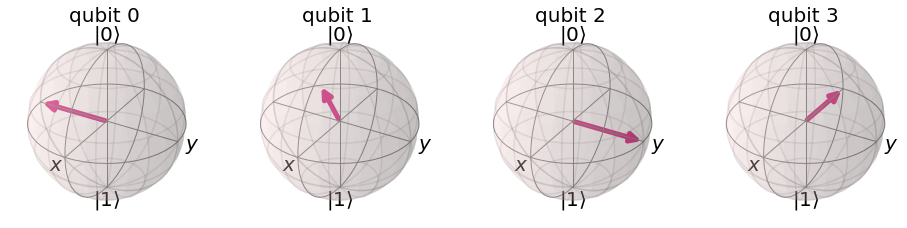

In [24]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

In [25]:
qc.barrier()
inverse_aqft_4qbits_2rot(qc)
qc.barrier()
qc.measure([0,1,2,3],[0,1,2,3])
qc.draw()

┌───┐ ░                           ░                           ░      »
q_0: ┤ X ├─░───────────────────────────░────────────────────■──────░──────»
     └───┘ ░                           ░                    │      ░ ┌───┐»
q_1: ──────░────────────────────■──────░──────────■─────────┼──────░─┤ H ├»
     ┌───┐ ░                    │      ░ ┌───┐┌───┴────┐┌───┴────┐ ░ └───┘»
q_2: ┤ X ├─░──────────■─────────┼──────░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├─░──────»
     ├───┤ ░ ┌───┐┌───┴────┐┌───┴────┐ ░ └───┘└────────┘└────────┘ ░      »
q_3: ┤ X ├─░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├─░───────────────────────────░──────»
     └───┘ ░ └───┘└────────┘└────────┘ ░                           ░      »
c: 4/═════════════════════════════════════════════════════════════════════»
                                                                          »
«                ░ ┌───┐    ░    ┌───┐ ░                  ░            »
«q_0: ────■──────░─┤ H ├─X──░──X─┤ H ├─░──────■───────────░──────■─────»
«     ┌───┴────┐ ░ └───┘ │  ░  │ └───┘ ░ ┌────┴────┐┌───┐ ░      │     »
«q_1: ┤ P(π/2) ├─░───X───┼──░──┼───X───░─┤ P(-π/2) ├┤ H ├─░──────┼─────»
«     └────────┘ ░   │   │  ░  │   │   ░ └─────────┘└───┘ ░ ┌────┴────┐»
«q_2: ───────────░───X───┼──░──┼───X───░──────────────────░─┤ P(-π/4) ├»
«                ░       │  ░  │       ░                  ░ └─────────┘»
«q_3: ───────────░───────X──░──X───────░──────────────────░────────────»
«                ░          ░          ░                  ░            »
«c: 4/═════════════════════════════════════════════════════════════════»
«                                                                      »
«                      ░                             ░ ┌─┐         
«q_0: ─────────────────░─────────────────────────────░─┤M├─────────
«                      ░                             ░ └╥┘┌─┐      
«q_1: ─────■───────────░──────■──────────────────────░──╫─┤M├──────
«     ┌────┴────┐┌───┐ ░      │                      ░  ║ └╥┘┌─┐   
«q_2: ┤ P(-π/2) ├┤ H ├─░──────┼──────────■───────────░──╫──╫─┤M├───
«     └─────────┘└───┘ ░ ┌────┴────┐┌────┴────┐┌───┐ ░  ║  ║ └╥┘┌─┐
«q_3: ─────────────────░─┤ P(-π/4) ├┤ P(-π/2) ├┤ H ├─░──╫──╫──╫─┤M├
«                      ░ └─────────┘└─────────┘└───┘ ░  ║  ║  ║ └╥┘
«c: 4/══════════════════════════════════════════════════╩══╩══╩══╩═
«                                                       0  1  2  3

In [26]:
sim = Aer.get_backend("qasm_simulator")
job = execute(qc,sim,shots=1000)
result = job.result()
counts = result.get_counts(qc)

print(counts)

{'1101': 1000}


## Ejecución en un backend real de la QFT

In [27]:
qc = QuantumCircuit(4,4)

#inicializo los cubits a |1101> (13 en binario)
qc.x(3)
qc.x(2)
qc.x(0)

qc.barrier()
aqft_4qbits_2rot(qc)
qc.barrier()
inverse_aqft_4qbits_2rot(qc)
qc.barrier()
qc.measure([0,1,2,3],[0,1,2,3])
qc.draw()

┌───┐ ░                           ░                           ░      »
q_0: ┤ X ├─░───────────────────────────░────────────────────■──────░──────»
     └───┘ ░                           ░                    │      ░ ┌───┐»
q_1: ──────░────────────────────■──────░──────────■─────────┼──────░─┤ H ├»
     ┌───┐ ░                    │      ░ ┌───┐┌───┴────┐┌───┴────┐ ░ └───┘»
q_2: ┤ X ├─░──────────■─────────┼──────░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├─░──────»
     ├───┤ ░ ┌───┐┌───┴────┐┌───┴────┐ ░ └───┘└────────┘└────────┘ ░      »
q_3: ┤ X ├─░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├─░───────────────────────────░──────»
     └───┘ ░ └───┘└────────┘└────────┘ ░                           ░      »
c: 4/═════════════════════════════════════════════════════════════════════»
                                                                          »
«                ░ ┌───┐    ░    ┌───┐ ░                  ░            »
«q_0: ────■──────░─┤ H ├─X──░──X─┤ H ├─░──────■───────────░──────■─────»
«     ┌───┴────┐ ░ └───┘ │  ░  │ └───┘ ░ ┌────┴────┐┌───┐ ░      │     »
«q_1: ┤ P(π/2) ├─░───X───┼──░──┼───X───░─┤ P(-π/2) ├┤ H ├─░──────┼─────»
«     └────────┘ ░   │   │  ░  │   │   ░ └─────────┘└───┘ ░ ┌────┴────┐»
«q_2: ───────────░───X───┼──░──┼───X───░──────────────────░─┤ P(-π/4) ├»
«                ░       │  ░  │       ░                  ░ └─────────┘»
«q_3: ───────────░───────X──░──X───────░──────────────────░────────────»
«                ░          ░          ░                  ░            »
«c: 4/═════════════════════════════════════════════════════════════════»
«                                                                      »
«                      ░                             ░ ┌─┐         
«q_0: ─────────────────░─────────────────────────────░─┤M├─────────
«                      ░                             ░ └╥┘┌─┐      
«q_1: ─────■───────────░──────■──────────────────────░──╫─┤M├──────
«     ┌────┴────┐┌───┐ ░      │                      ░  ║ └╥┘┌─┐   
«q_2: ┤ P(-π/2) ├┤ H ├─░──────┼──────────■───────────░──╫──╫─┤M├───
«     └─────────┘└───┘ ░ ┌────┴────┐┌────┴────┐┌───┐ ░  ║  ║ └╥┘┌─┐
«q_3: ─────────────────░─┤ P(-π/4) ├┤ P(-π/2) ├┤ H ├─░──╫──╫──╫─┤M├
«                      ░ └─────────┘└─────────┘└───┘ ░  ║  ║  ║ └╥┘
«c: 4/══════════════════════════════════════════════════╩══╩══╩══╩═
«                                                       0  1  2  3

In [28]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
qobj = assemble(transpiled_qc, shots=shots)
job = backend.run(qobj)
job_monitor(job)

Job Status: job has successfully run


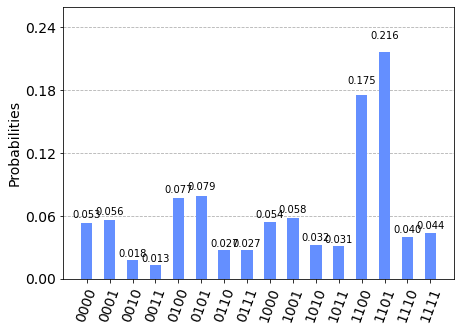

In [29]:
counts = job.result().get_counts()
plot_histogram(counts)

### Comentario: 

Nos da un resultado similar a la ejecución en un backend real de la QFT. Esperaba que la AQFT fuera mas precisa en la teoría, al existir una significante cantidad de ruido, la AQFT puede llegar a ser mas precisa que la QFT pero los resultados obtenidos no indican nada al respecto.